In [1]:
%pip install seaborn
import piplite

await piplite.install(['nbformat', 'plotly'])

In [2]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod1.csv"

In [3]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

path = URL

await download(path, "dataset.csv")

In [6]:
import pandas as pd

# Specify the file path
#file_path = "path/to/your/file.csv"

# Read the CSV file into a Pandas data frame
df = pd.read_csv(path)

# Assuming the first rows of the file are the headers, you don't need to specify any additional parameters

# Additional details:
# - The `pd.read_csv()` function is used to read a CSV file into a Pandas data frame.
# - By default, it assumes that the first row of the file contains the headers for the data.
# - If your file doesn't have headers, you can specify `header=None` as an additional parameter.
# - You can also specify other parameters, such as `sep` to specify the delimiter used in the file.
# - Make sure you have the Pandas library installed in your Python environment before running this code.

<class 'urllib.error.URLError'>: <urlopen error [Errno 23] Host is unreachable>

In [7]:
# 1. Import a data set from a CSV file
data = pd.read_csv('dataset.csv')

# 2. Generate the statistical description of all the features
description = data.describe(include='all')

print(description)

        Unnamed: 0 Manufacturer    Category   Screen         GPU          OS  \
count   238.000000          238  238.000000      238  238.000000  238.000000   
unique         NaN           11         NaN        2         NaN         NaN   
top            NaN         Dell         NaN  Full HD         NaN         NaN   
freq           NaN           71         NaN      161         NaN         NaN   
mean    118.500000          NaN    3.205882      NaN    2.151261    1.058824   
std      68.848868          NaN    0.776533      NaN    0.638282    0.235790   
min       0.000000          NaN    1.000000      NaN    1.000000    1.000000   
25%      59.250000          NaN    3.000000      NaN    2.000000    1.000000   
50%     118.500000          NaN    3.000000      NaN    2.000000    1.000000   
75%     177.750000          NaN    4.000000      NaN    3.000000    1.000000   
max     237.000000          NaN    5.000000      NaN    3.000000    2.000000   

          CPU_core  Screen_Size_cm  CPU

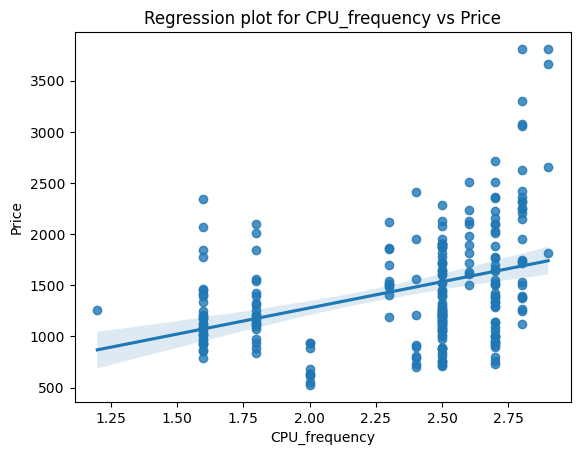

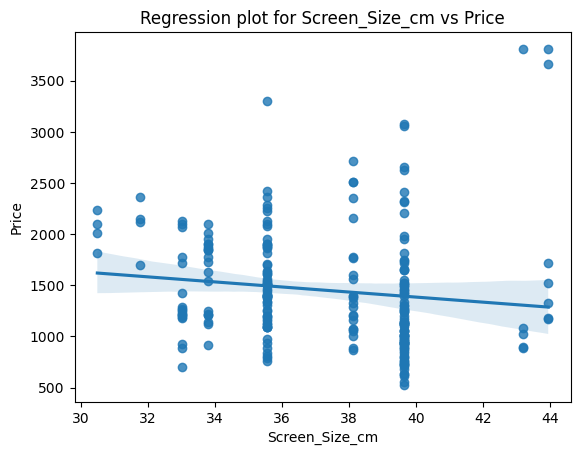

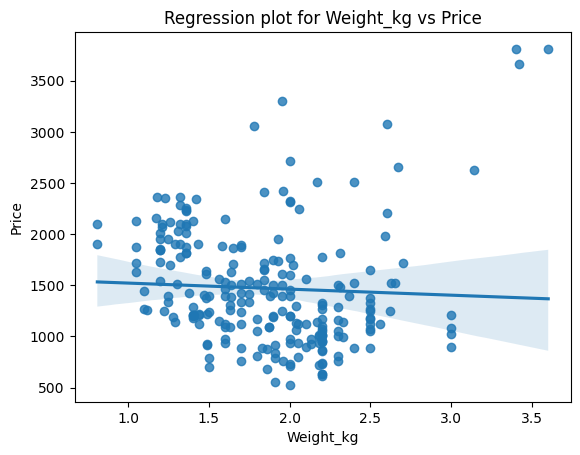

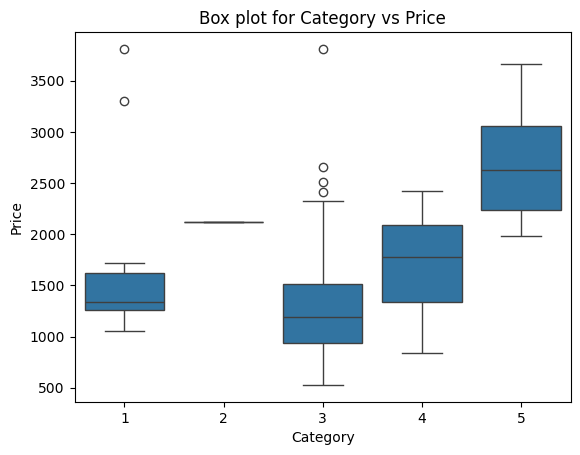

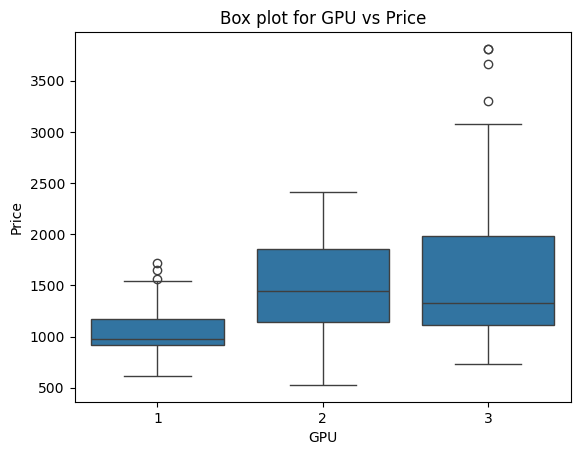

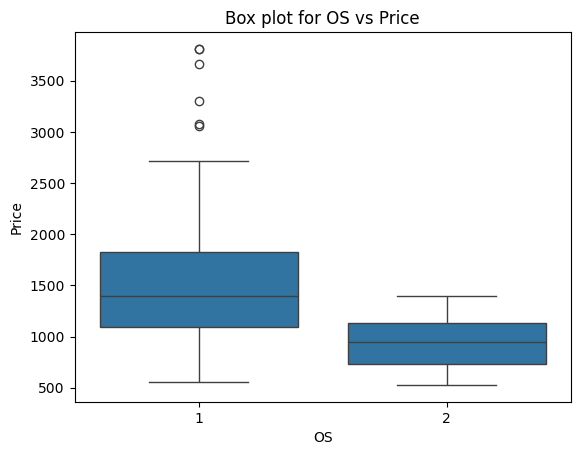

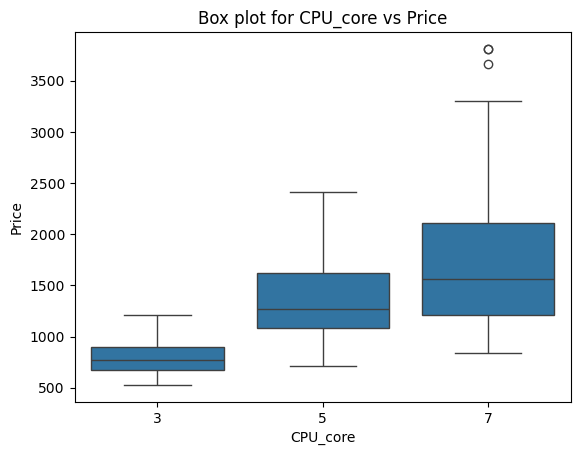

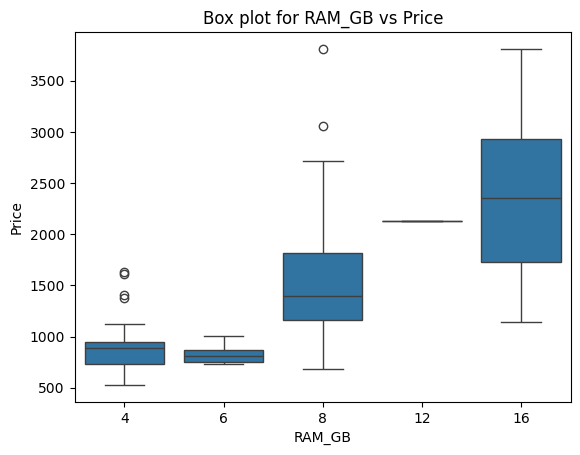

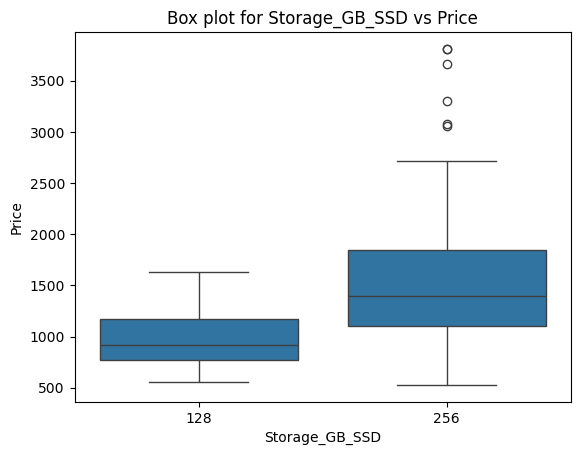

In [11]:

import seaborn as sns
import matplotlib.pyplot as plt

# 1. Create regression plots
data = pd.read_csv('dataset.csv')

regression_attributes = ['CPU_frequency', 'Screen_Size_cm', 'Weight_kg']
for attribute in regression_attributes:
    sns.regplot(x=attribute, y='Price', data=data)
    plt.title(f'Regression plot for {attribute} vs Price')
    plt.xlabel(attribute)
    plt.ylabel('Price')
    plt.show()

# 2. Create box plots
boxplot_attributes = ['Category', 'GPU', 'OS', 'CPU_core', 'RAM_GB', 'Storage_GB_SSD']
for attribute in boxplot_attributes:
    sns.boxplot(x=attribute, y='Price', data=data)
    plt.title(f'Box plot for {attribute} vs Price')
    plt.xlabel(attribute)
    plt.ylabel('Price')
    plt.show()

In [9]:
print(data.columns)



Index(['Unnamed: 0', 'Manufacturer', 'Category', 'Screen', 'GPU', 'OS',
       'CPU_core', 'Screen_Size_cm', 'CPU_frequency', 'RAM_GB',
       'Storage_GB_SSD', 'Weight_kg', 'Price'],
      dtype='object')


In [16]:
import numpy as np
from scipy.stats import pearsonr
# Assuming your dataframe has a target attribute 'Price'
df = pd.read_csv('dataset.csv')

In [17]:
# Select numerical attributes
numerical_attributes = df.select_dtypes(include=np.number)


In [18]:
# Calculate correlation values for all numerical attributes against 'Price'
correlation_values = numerical_attributes.corr()['Price'].drop('Price')

In [19]:
# Calculate Pearson coefficient and p-values for all numerical attributes against 'Price'
pearson_coefficients = []
p_values = []

In [21]:
# Показати, де є NaN значення в колонці
print(numerical_attributes[column].isna())

# Показати кількість NaN значень у кожній колонці
print(numerical_attributes.isna().sum())


0      False
1      False
2      False
3      False
4      False
       ...  
233    False
234    False
235    False
236    False
237    False
Name: Screen_Size_cm, Length: 238, dtype: bool
Unnamed: 0        0
Category          0
GPU               0
OS                0
CPU_core          0
Screen_Size_cm    4
CPU_frequency     0
RAM_GB            0
Storage_GB_SSD    0
Weight_kg         5
Price             0
dtype: int64


In [22]:
# Перевірка на Inf (як для позитивних, так і для негативних Inf)
print(np.isinf(numerical_attributes[column]))

# Показати кількість Inf значень у кожній колонці
print(np.isinf(numerical_attributes).sum())


0      False
1      False
2      False
3      False
4      False
       ...  
233    False
234    False
235    False
236    False
237    False
Name: Screen_Size_cm, Length: 238, dtype: bool
Unnamed: 0        0
Category          0
GPU               0
OS                0
CPU_core          0
Screen_Size_cm    0
CPU_frequency     0
RAM_GB            0
Storage_GB_SSD    0
Weight_kg         0
Price             0
dtype: int64


In [23]:
# Замінити всі NaN значення на середнє значення кожної колонки
numerical_attributes = numerical_attributes.apply(lambda col: col.fillna(col.mean()) if col.isna().any() else col)


In [31]:
# Показати, де є NaN значення в колонці
print(numerical_attributes[column].isna())

# Показати кількість NaN значень у кожній колонці
print(numerical_attributes.isna().sum())

0      False
1      False
2      False
3      False
4      False
       ...  
233    False
234    False
235    False
236    False
237    False
Name: Price, Length: 238, dtype: bool
Unnamed: 0        0
Category          0
GPU               0
OS                0
CPU_core          0
Screen_Size_cm    0
CPU_frequency     0
RAM_GB            0
Storage_GB_SSD    0
Weight_kg         0
Price             0
dtype: int64


In [32]:
print(numerical_attributes[column].shape)
print(df['Price'].shape)


(238,)
(238,)


In [34]:
print(len(correlation_values))  # Довжина кореляційних значень
print(len(pearson_coefficients))  # Довжина коефіцієнтів Пірсона
print(len(p_values))  # Довжина p-значень


10
25
25


In [26]:
# Create a new dataframe to store the results
results_df = pd.DataFrame({'Attribute': correlation_values.index, 'Correlation Value': correlation_values, 'Pearson Coefficient': pearson_coefficients, 'P-value': p_values})
# Print the results
print(results_df)

<class 'ValueError'>: All arrays must be of the same length

In [35]:
# Виведення результатів у вигляді таблиці через цикл
print(f"{'Attribute':<20} {'Correlation Value':<20} {'Pearson Coefficient':<20} {'P-value':<20}")
for idx, column in enumerate(correlation_values.index):
    print(f"{column:<20} {correlation_values[column]:<20} {pearson_coefficients[idx]:<20} {p_values[idx]:<20}")


Attribute            Correlation Value    Pearson Coefficient  P-value             
Unnamed: 0           0.32193291314757005  0.32193291314756983  3.8510584639457855e-07
Category             0.2862427558126411   0.286242755812641    7.225696235806858e-06
GPU                  0.2882981988881431   0.2882981988881427   6.166949698364507e-06
OS                   -0.22172980114827417 -0.22172980114827356 0.0005696642559246817
CPU_core             0.45939777733551124  0.45939777733551174  7.912950127008979e-14
Screen_Size_cm       -0.1282330793476166  0.32193291314756983  3.8510584639457855e-07
CPU_frequency        0.3666655589258862   0.286242755812641    7.225696235806858e-06
RAM_GB               0.5492972971857845   0.2882981988881427   6.166949698364507e-06
Storage_GB_SSD       0.24342075521810294  -0.22172980114827356 0.0005696642559246817
Weight_kg            -0.0507073334120666  0.45939777733551174  7.912950127008979e-14


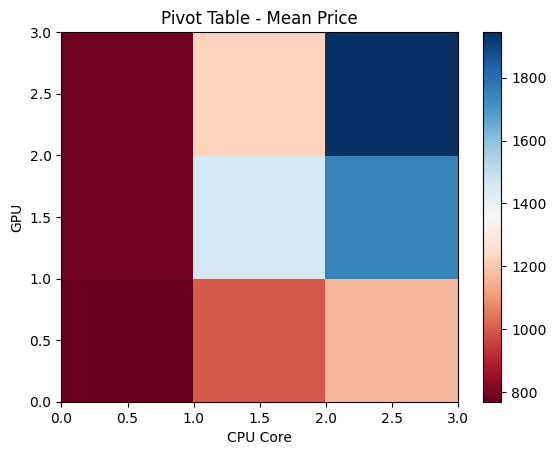

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Import the data set as a pandas DataFrame
df = pd.read_csv('dataset.csv')

# Group the attributes
grouped_data = df.groupby(['GPU', 'CPU_core'])['Price'].mean()

# Create a pivot table
pivot_table = pd.pivot_table(df, values='Price', index='GPU', columns='CPU_core', aggfunc='mean')

# Plot a pcolor plot
plt.pcolor(pivot_table, cmap='RdBu')
plt.colorbar()
plt.title('Pivot Table - Mean Price')
plt.xlabel('CPU Core')
plt.ylabel('GPU')
plt.show()